<a href="https://colab.research.google.com/github/Lyv24/Tareas_THC/blob/main/Clase_14_de_noviembre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cruz Contreras Isari Lyvier

In [ ]:
!pip install skforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.3/397.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.8 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Successfully uninstalled tqdm-4.66.1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
link = "https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_2014_2016_clean.csv"

code = "?raw=true"
url = link+code
df = pd.read_csv(url,sep=",",index_col=1)

In [ ]:
df

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,Guinea,482,287.0,289.2,192.8,86.76,57.84,173.52,115.68,28.92,19.28
29/08/2014,Nigeria,15,6.0,9.0,6.0,2.70,1.80,5.40,3.60,0.90,0.60
29/08/2014,Sierra Leone,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40
29/08/2014,Liberia,322,225.0,193.2,128.8,57.96,38.64,115.92,77.28,19.32,12.88
05/09/2014,Guinea,604,362.0,362.4,241.6,108.72,72.48,217.44,144.96,36.24,24.16
...,...,...,...,...,...,...,...,...,...,...,...
23/03/2016,Liberia,3151,NaN,1890.6,1260.4,567.18,378.12,1134.36,756.24,189.06,126.04
23/03/2016,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
23/03/2016,Liberia,2,1.0,1.2,0.8,0.36,0.24,0.72,0.48,0.12,0.08


In [ ]:
#Para saber cuantos datos hay
df.shape


(2484, 11)

In [ ]:
#El contenido del archivo
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2484 entries, 29/08/2014 to 23/03/2016
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  2484 non-null   object 
 1   No. of confirmed cases   2484 non-null   int64  
 2   No. of confirmed deaths  1648 non-null   float64
 3   Male Cases               2484 non-null   float64
 4   Female Cases             2484 non-null   float64
 5   Boys                     2484 non-null   float64
 6   Girls                    2484 non-null   float64
 7   Adult Male               2484 non-null   float64
 8   Adult Female             2484 non-null   float64
 9   Old Male                 2484 non-null   float64
 10  Old Female               2484 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 232.9+ KB


In [ ]:
#Los primeros 5
df.head()

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,Guinea,482,287.0,289.2,192.8,86.76,57.84,173.52,115.68,28.92,19.28
29/08/2014,Nigeria,15,6.0,9.0,6.0,2.70,1.80,5.40,3.60,0.90,0.60
29/08/2014,Sierra Leone,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40
29/08/2014,Liberia,322,225.0,193.2,128.8,57.96,38.64,115.92,77.28,19.32,12.88
05/09/2014,Guinea,604,362.0,362.4,241.6,108.72,72.48,217.44,144.96,36.24,24.16


In [ ]:
#Los últimos 5
df.tail()

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
23/03/2016,Liberia,3151,NaN,1890.6,1260.4,567.18,378.12,1134.36,756.24,189.06,126.04
23/03/2016,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
23/03/2016,Liberia,2,1.0,1.2,0.8,0.36,0.24,0.72,0.48,0.12,0.08
23/03/2016,Nigeria,19,7.0,11.4,7.6,3.42,2.28,6.84,4.56,1.14,0.76
23/03/2016,United States of America,4,1.0,2.4,1.6,0.72,0.48,1.44,0.96,0.24,0.16


In [ ]:
#Saca cuantos datos tengo
df.isnull().sum()

Country                      0
No. of confirmed cases       0
No. of confirmed deaths    836
Male Cases                   0
Female Cases                 0
Boys                         0
Girls                        0
Adult Male                   0
Adult Female                 0
Old Male                     0
Old Female                   0
dtype: int64

In [ ]:
#Acceder a columnas
df['Country']

Date
29/08/2014                      Guinea
29/08/2014                     Nigeria
29/08/2014                Sierra Leone
29/08/2014                     Liberia
05/09/2014                      Guinea
                        ...           
23/03/2016                     Liberia
23/03/2016                       Italy
23/03/2016                     Liberia
23/03/2016                     Nigeria
23/03/2016    United States of America
Name: Country, Length: 2484, dtype: object

In [ ]:
#Acceder a columnas (Saber si está uno en específico)
df['Country'].isin(["México"]).sum() #México no está en la base de datos

0

In [ ]:
SL=df[df["Country"]=="Sierra Leone"]

In [ ]:
#Saca solo los datos del que se indicó anteriormente
SL

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,Sierra Leone,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40
05/09/2014,Sierra Leone,1146,443.0,687.6,458.4,206.28,137.52,412.56,275.04,68.76,45.84
08/09/2014,Sierra Leone,1234,461.0,740.4,493.6,222.12,148.08,444.24,296.16,74.04,49.36
12/09/2014,Sierra Leone,1287,478.0,772.2,514.8,231.66,154.44,463.32,308.88,77.22,51.48
16/09/2014,Sierra Leone,1464,514.0,878.4,585.6,263.52,175.68,527.04,351.36,87.84,58.56
...,...,...,...,...,...,...,...,...,...,...,...
17/12/2015,Sierra Leone,8704,3589.0,5222.4,3481.6,1566.72,1044.48,3133.44,2088.96,522.24,348.16
22/12/2015,Sierra Leone,8704,3589.0,5222.4,3481.6,1566.72,1044.48,3133.44,2088.96,522.24,348.16
23/12/2015,Sierra Leone,8704,3589.0,5222.4,3481.6,1566.72,1044.48,3133.44,2088.96,522.24,348.16


In [ ]:
#Borra la columna indicada (en este caso es "Country")
SL=SL.drop("Country",axis=1)

In [ ]:
#Imprime el indicado anteriormente
SL.head()

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,Sierra Leone,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40
05/09/2014,Sierra Leone,1146,443.0,687.6,458.4,206.28,137.52,412.56,275.04,68.76,45.84
08/09/2014,Sierra Leone,1234,461.0,740.4,493.6,222.12,148.08,444.24,296.16,74.04,49.36
12/09/2014,Sierra Leone,1287,478.0,772.2,514.8,231.66,154.44,463.32,308.88,77.22,51.48
16/09/2014,Sierra Leone,1464,514.0,878.4,585.6,263.52,175.68,527.04,351.36,87.84,58.56


In [ ]:
#Subconjunto del 15 hasta el 19
SL[15:20]

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
22/10/2014,Sierra Leone,3223,986.0,1933.8,1289.2,580.14,386.76,1160.28,773.52,193.38,128.92
25/10/2014,Sierra Leone,3389,1008.0,2033.4,1355.6,610.02,406.68,1220.04,813.36,203.34,135.56
29/10/2014,Sierra Leone,3700,NaN,2220.0,1480.0,666.00,444.00,1332.00,888.00,222.00,148.00
31/10/2014,Sierra Leone,3778,NaN,2266.8,1511.2,680.04,453.36,1360.08,906.72,226.68,151.12
05/11/2014,Sierra Leone,4057,893.0,2434.2,1622.8,730.26,486.84,1460.52,973.68,243.42,162.28


In [ ]:
SL.shape

(259, 11)

In [ ]:
#Número de datos faltantes (en este caso son 2)
SL.isnull().sum()

No. of confirmed cases     0
No. of confirmed deaths    2
Male Cases                 0
Female Cases               0
Boys                       0
Girls                      0
Adult Male                 0
Adult Female               0
Old Male                   0
Old Female                 0
dtype: int64

In [ ]:
#Rellenar con el promedio, la mediana, 0, etc. a los casos faltantes
SL.fillna(0.0,inplace=True)

<ipython-input-33-3d19ad59fc05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SL.fillna(0.0,inplace=True)


In [ ]:
#De este modo ya no salen datos faltantes
SL.isnull().sum()

Country                    0
No. of confirmed cases     0
No. of confirmed deaths    0
Male Cases                 0
Female Cases               0
Boys                       0
Girls                      0
Adult Male                 0
Adult Female               0
Old Male                   0
Old Female                 0
dtype: int64

In [ ]:
#Saca el número de datos de lo que especifiques (En este caso es el número de muertes confirmadas)
SL["No. of confirmed deaths"].mean()

3081.019305019305

In [ ]:
#Del mismo modo que arriba pero en este caso es el número de casos confirmados
SL["No. of confirmed cases"].mean()

7883.671814671815

In [ ]:
#Gráfica de los datos
Dates=SL.index[0:-1:10]#Selecciona desde el primero hasta el último y va de 10 en 10
NCC=SL["No. of confirmed cases"][0:-1:10]
NCD=SL["No. of confirmed deaths"][0:-1:10]

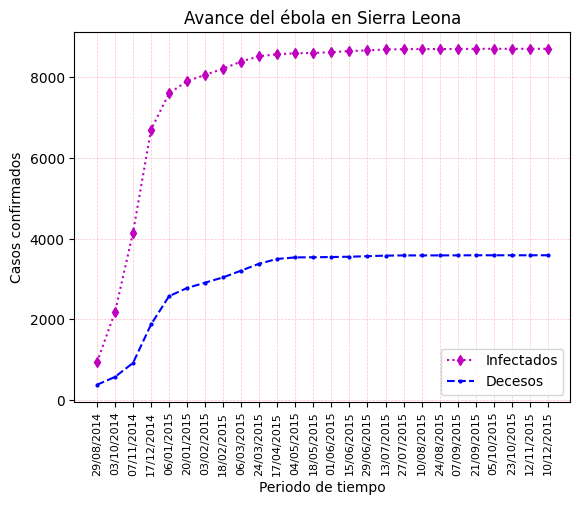

In [ ]:
plt.plot(Dates,NCC,"d:m", ms = 5,label="Infectados")
plt.plot(Dates,NCD,"o--b",ms=2,label="Decesos")
plt.grid(color = "pink", linestyle = "--", linewidth = 0.5)
plt.title("Avance del ébola en Sierra Leona")
plt.ylabel("Casos confirmados")
plt.xlabel("Periodo de tiempo")
plt.xticks(rotation=90,fontsize=8)
plt.legend()
plt.show()


In [ ]:
#Sacamos el porcentaje
PIvsD=100*SL["No. of confirmed deaths"]/SL["No. of confirmed cases"]
SL["PIvsD"]=PIvsD
SL.head()

<ipython-input-40-b18afdb7f1e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SL["PIvsD"]=PIvsD


,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female,PIvsD
Date,,,,,,,,,,,,
29/08/2014,Sierra Leone,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40,40.641711
05/09/2014,Sierra Leone,1146,443.0,687.6,458.4,206.28,137.52,412.56,275.04,68.76,45.84,38.656195
08/09/2014,Sierra Leone,1234,461.0,740.4,493.6,222.12,148.08,444.24,296.16,74.04,49.36,37.358185
12/09/2014,Sierra Leone,1287,478.0,772.2,514.8,231.66,154.44,463.32,308.88,77.22,51.48,37.140637
16/09/2014,Sierra Leone,1464,514.0,878.4,585.6,263.52,175.68,527.04,351.36,87.84,58.56,35.109290


In [ ]:
recuperados=((100-PIvsD)/100)*SL["No. of confirmed cases"]
SL["recuperados"]=recuperados
SL.head()

<ipython-input-41-a7b719ae5a81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SL["recuperados"]=recuperados


,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female,PIvsD,recuperados
Date,,,,,,,,,,,,,
29/08/2014,Sierra Leone,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40,40.641711,555.0
05/09/2014,Sierra Leone,1146,443.0,687.6,458.4,206.28,137.52,412.56,275.04,68.76,45.84,38.656195,703.0
08/09/2014,Sierra Leone,1234,461.0,740.4,493.6,222.12,148.08,444.24,296.16,74.04,49.36,37.358185,773.0
12/09/2014,Sierra Leone,1287,478.0,772.2,514.8,231.66,154.44,463.32,308.88,77.22,51.48,37.140637,809.0
16/09/2014,Sierra Leone,1464,514.0,878.4,585.6,263.52,175.68,527.04,351.36,87.84,58.56,35.109290,950.0


In [ ]:
#Clase 9 de noviembre
SL.fillna(mean_values,inplace=True)

<ipython-input-46-9af04f19e9cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SL.fillna(mean_values,inplace=True)


In [ ]:
SL.isnull().sum()

Country                    0
No. of confirmed cases     0
No. of confirmed deaths    0
Male Cases                 0
Female Cases               0
Boys                       0
Girls                      0
Adult Male                 0
Adult Female               0
Old Male                   0
Old Female                 0
PIvsD                      0
recuperados                0
dtype: int64

In [ ]:
mean_values=SL["No. of confirmed deaths"].mean()#Rellenar los datos faltantes con el promedio de todos los demas datos
mean_values

3081.019305019305

In [ ]:
SL.fillna(mean_values,inplace=True)

<ipython-input-47-6658fb61a808>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SL.fillna(mean_values,inplace=True)


In [ ]:
SL.isnull().sum()

Country                    0
No. of confirmed cases     0
No. of confirmed deaths    0
Male Cases                 0
Female Cases               0
Boys                       0
Girls                      0
Adult Male                 0
Adult Female               0
Old Male                   0
Old Female                 0
PIvsD                      0
recuperados                0
dtype: int64

In [ ]:
Dates=SL.index[0:-1:10]#Selecciona desde el primero hasta el último y va de 10 en 10
NCC=SL["No. of confirmed cases"][0:-1:10]
NCD=SL["No. of confirmed deaths"][0:-1:10]

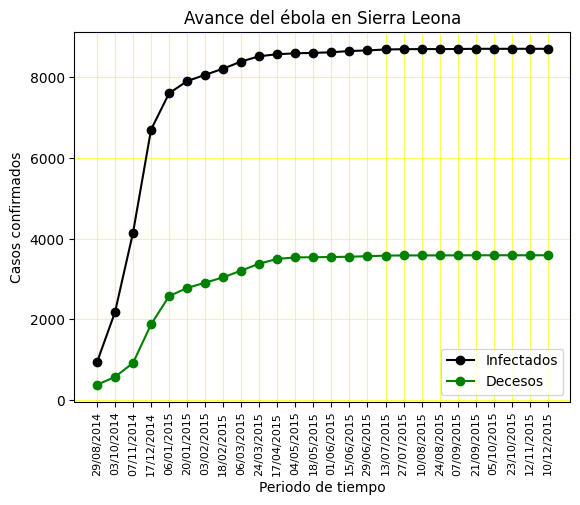

In [ ]:
plt.plot(Dates,NCC,"o-k", ms = 6,label="Infectados")
plt.plot(Dates,NCD,"o-g",ms=6,label="Decesos")
plt.grid(color = "yellow", linestyle = "-", linewidth = 0.5)
plt.title("Avance del ébola en Sierra Leona")
plt.ylabel("Casos confirmados")
plt.xlabel("Periodo de tiempo")
plt.xticks(rotation=90,fontsize=8)
plt.legend()
plt.show()

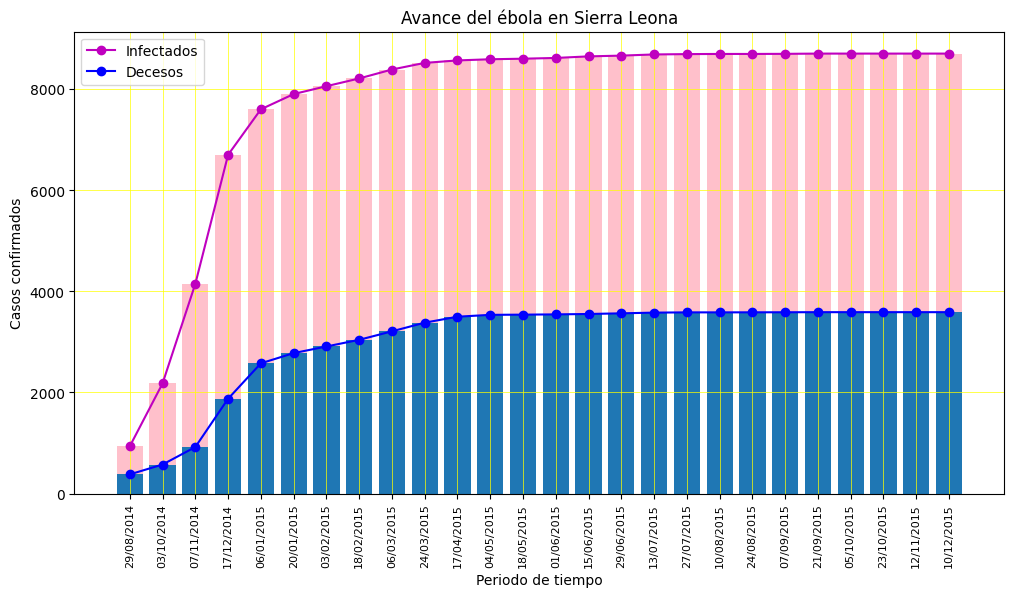

In [ ]:
fig=plt.figure(figsize=(12,6))
plt.plot(Dates,NCC,"o-m", ms = 6,label="Infectados")
plt.bar(Dates,NCC,color="pink")
plt.plot(Dates,NCD,"o-b",ms=6,label="Decesos")
plt.bar(Dates,NCD)
plt.grid(color = "yellow", linestyle = "-", linewidth = 0.5)
plt.title("Avance del ébola en Sierra Leona")
plt.ylabel("Casos confirmados")
plt.xlabel("Periodo de tiempo")
plt.xticks(rotation=90,fontsize=8)
plt.savefig("Grafica_de_barras.png",dpi=300,format="png")#Para guardar la imagen
plt.legend()
plt.show()

In [ ]:
PIvsD=100*SL["No. of confirmed deaths"]/SL["No. of confirmed cases"]
SL["PIvsD"]=PIvsD

<ipython-input-52-883a378005be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SL["PIvsD"]=PIvsD


In [ ]:
recuperados=((100-PIvsD)/100)*SL["No. of confirmed cases"]
SL["recuperados"]=recuperados

<ipython-input-53-29bcc6792231>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SL["recuperados"]=recuperados


In [ ]:
SL["PR"]=(100-PIvsD)

<ipython-input-54-8949a34cfbef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SL["PR"]=(100-PIvsD)


In [ ]:
SL.head()

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female,PIvsD,recuperados,PR
Date,,,,,,,,,,,,,,
29/08/2014,Sierra Leone,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40,40.641711,555.0,59.358289
05/09/2014,Sierra Leone,1146,443.0,687.6,458.4,206.28,137.52,412.56,275.04,68.76,45.84,38.656195,703.0,61.343805
08/09/2014,Sierra Leone,1234,461.0,740.4,493.6,222.12,148.08,444.24,296.16,74.04,49.36,37.358185,773.0,62.641815
12/09/2014,Sierra Leone,1287,478.0,772.2,514.8,231.66,154.44,463.32,308.88,77.22,51.48,37.140637,809.0,62.859363
16/09/2014,Sierra Leone,1464,514.0,878.4,585.6,263.52,175.68,527.04,351.36,87.84,58.56,35.109290,950.0,64.890710


In [ ]:
PIvsD_mean=SL["PIvsD"].mean()
PR_mean=SL["PR"].mean()
porcentajes=[PIvsD_mean,PR_mean]
etiquetas=["PIvsD","PR"]

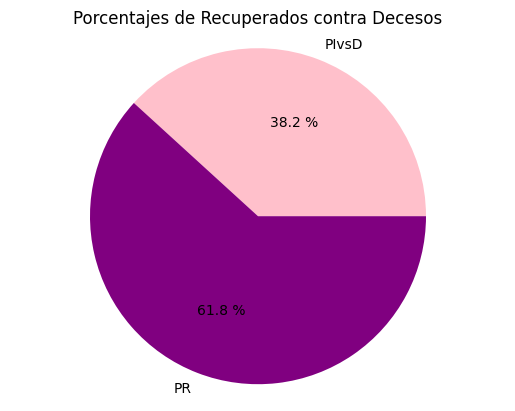

In [ ]:
plt.pie(porcentajes,labels=etiquetas,autopct="%0.1f %%",colors=["pink","purple"])
plt.axis("equal")
plt.title("Porcentajes de Recuperados contra Decesos")
plt.show()


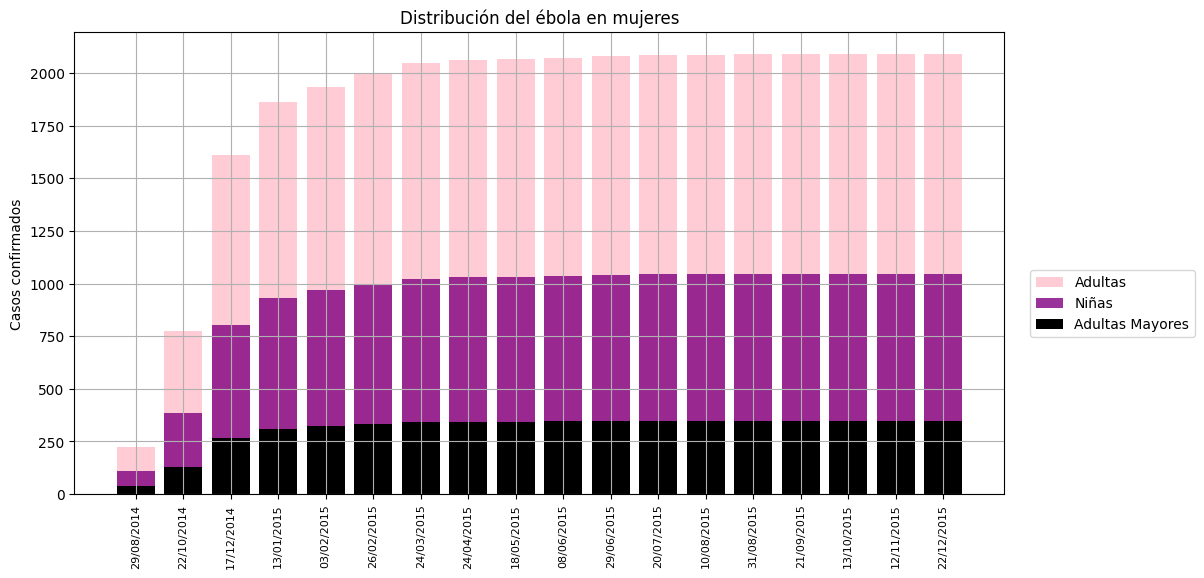

In [ ]:
#Clase 14 de noviembre
#Tomamos los datos de las mujeres
G=SL["Girls"][0:-1:15]
#Tomo a las adultas
AF=SL["Adult Female"][0:-1:15]
#Tomo a las ancianas
OF=SL["Old Female"][0:-1:15]
Dates=SL.index[0:-1:15]
fig=plt.figure(figsize=(12,6))
plt.bar(Dates,AF,color="pink",alpha=0.8,label="Adultas")
plt.bar(Dates,G,color="purple",alpha=0.8,label="Niñas")
plt.bar(Dates,OF,color="black",label="Adultas Mayores")
plt.grid()
plt.title("Distribución del ébola en mujeres")
plt.ylabel("Casos confirmados")
plt.xticks(rotation=90,fontsize=8)
plt.legend(loc="upper left",bbox_to_anchor=(1.02,0.5))
plt.savefig("FemaleSL.png",dpi=300,format="png")
plt.show()

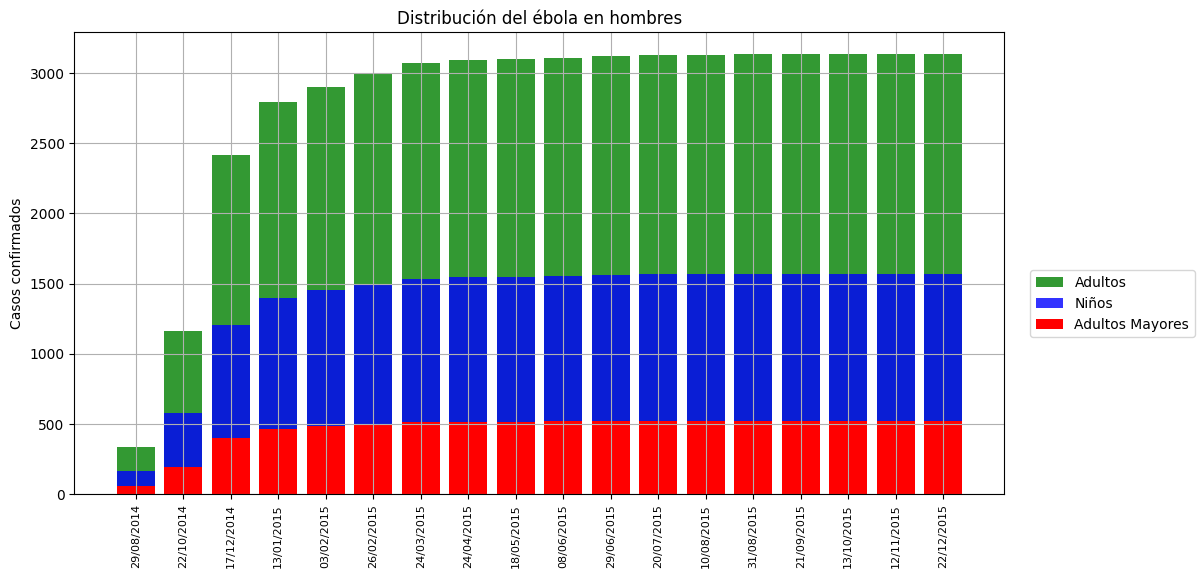

In [ ]:
B=SL["Boys"][0:-1:15]
AM=SL["Adult Male"][0:-1:15]
OM=SL["Old Male"][0:-1:15]
Dates=SL.index[0:-1:15]
fig=plt.figure(figsize=(12,6))
plt.bar(Dates,AM,color="green",alpha=0.8,label="Adultos")
plt.bar(Dates,B,color="blue",alpha=0.8,label="Niños")
plt.bar(Dates,OM,color="red",label="Adultos Mayores")
plt.grid()
plt.title("Distribución del ébola en hombres")
plt.ylabel("Casos confirmados")
plt.xticks(rotation=90,fontsize=8)
plt.legend(loc="upper left",bbox_to_anchor=(1.02,0.5))
plt.savefig("MaleSL.png",dpi=300,format="png")
plt.show()

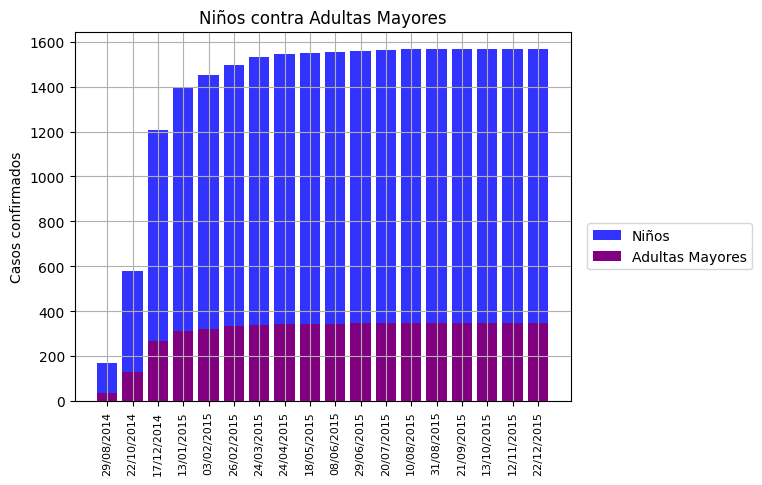

In [ ]:
plt.bar(Dates,B,color="blue",alpha=0.8,label="Niños")
plt.bar(Dates,OF,color="purple",label="Adultas Mayores")
plt.grid()
plt.title("Niños contra Adultas Mayores")
plt.ylabel("Casos confirmados")
plt.xticks(rotation=90,fontsize=8)
plt.legend(loc="upper left",bbox_to_anchor=(1.02,0.5))
plt.savefig("MaleSL.png",dpi=300,format="png")
plt.show()

In [ ]:
Boys=SL["Boys"].to_numpy()
SL_Boys=pd.DataFrame({"Boys":Boys})
SL_Boys.index=pd.to_datetime(SL.index,format="%d/%m/%Y")#Cambia el formato de la fecha al dia/mes/año
SL_Bpoys=SL_Boys.sort_index()

In [ ]:
SL_Boys

,Boys
Date,
2014-08-29,168.30
2014-09-05,206.28
2014-09-08,222.12
2014-09-12,231.66
2014-09-16,263.52
...,...
2015-12-17,1566.72
2015-12-22,1566.72
2015-12-23,1566.72


In [ ]:
steps=57

data_train=SL_Boys[:-steps]
data_test=SL_Boys[-steps:]

In [ ]:
print(f"Las fechas son {len(data_train)}")

Las fechas son 202


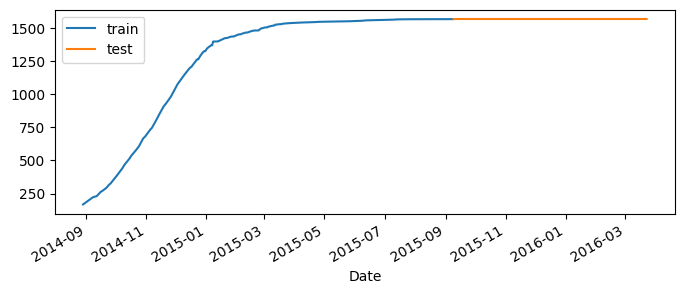

In [ ]:
fig,ax=plt.subplots(figsize=(8,3))
data_train["Boys"].plot(ax=ax,label="train")
data_test["Boys"].plot(ax=ax,label="test")
ax.legend()
plt.show()

In [ ]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forecaster=ForecasterAutoreg(
    regressor=RandomForestRegressor(random_state=123),
    lags=6
)

In [ ]:
forecaster.fit(y=data_train["Boys"])

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:788: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:788: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


In [ ]:
steps=57
predicciones=forecaster.predict(steps=steps)

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:850: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


In [ ]:
predicciones.index=data_test.index

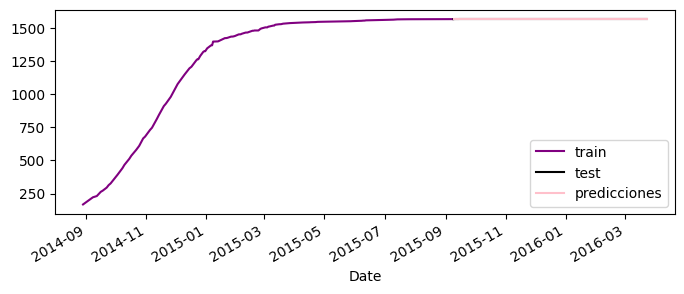

In [ ]:
fig,ax=plt.subplots(figsize=(8,3))
data_train["Boys"].plot(ax=ax,label="train",color="purple")
data_test["Boys"].plot(ax=ax,label="test",color="black")
predicciones.plot(ax=ax,label="predicciones",color="pink")
ax.legend()
plt.show()